In [49]:
import locale
from pathlib import Path
from typing import Sequence

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
PATH_TRAIN = Path(r"data/synthetic_weather_train_4_4_0.9.csv")
PATH_TEST = Path(r"data/synthetic_weather_test_4_4_0.9.csv")
DAY_INDEX_TRAIN = [1, 11, 23, 35, 45, 54, 70, 75] #  by day
DAY_INDEX_TEST = [0, 4, 7, 26, 32, 46, 49, 54]

LEGEND = {
    'Irradiance 0': 'Módulo 1',
    'Irradiance 1': 'Módulo 2',
    'Irradiance 2': 'Módulo 3',
    'Irradiance 3': 'Módulo 4',
}

CB91_Blue = "#2CBDFE"
CB91_Green = "#47DBCD"
CB91_Pink = "#F3A0F2"
CB91_Purple = "#9D2EC5"
CB91_Violet = "#661D98"
CB91_Amber = "#F5B14C"

color_list = [
    CB91_Blue,
    CB91_Amber,
    CB91_Green,
    CB91_Violet,
    CB91_Pink,
    CB91_Purple,
]

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=color_list)

plt.rc("text", usetex=True)
plt.rc("font", family="serif")

locale.setlocale(locale.LC_ALL, 'es-MX')
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

In [51]:
def read_csv(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", drop=True, inplace=True)

    return df


def plot(df: pd.DataFrame):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i, col in enumerate(df.columns, start=1):
        if "Amb" in col:
            continue  # Skip ambient temperatures
        ax.plot(df.index, df[col], label=LEGEND[col], dashes=[i,i])
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.set_ylabel("Irradiancia solar $\mathrm{(W/m^2)}$")
        ax.legend(loc="upper left", handlelength=3.6)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    

    return fig

def add_year_offset(df: pd.DataFrame) -> pd.DataFrame:
    df.index = df.index + pd.DateOffset(years=1)
    return df


def split_df_by_day(df: pd.DataFrame) -> Sequence[pd.DataFrame]:
    return [group[1] for group in df.groupby(df.index.date)]

def add_day_offset(df: pd.DataFrame, days: int) -> pd.DataFrame:
    df.index = df.index + pd.DateOffset(days=days)
    return df

In [52]:
df_train = read_csv(PATH_TRAIN)
df_test = read_csv(PATH_TEST)
df_test = add_year_offset(df_test)
df_train_day = split_df_by_day(df_train)
df_test_day = split_df_by_day(df_test)

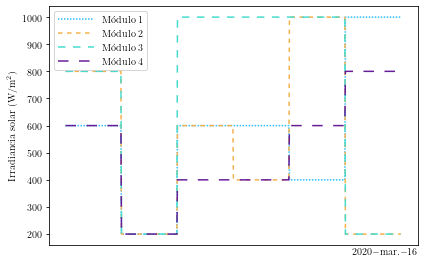

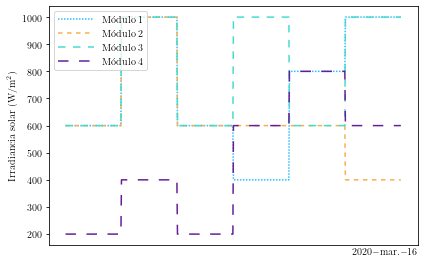

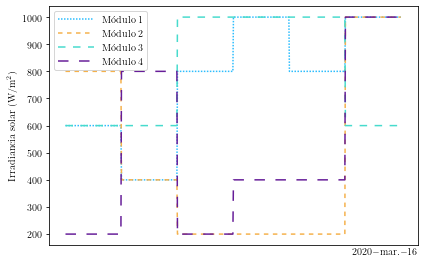

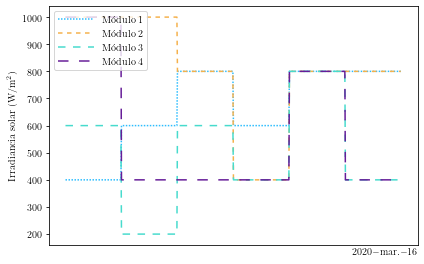

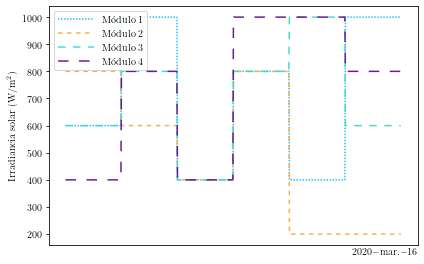

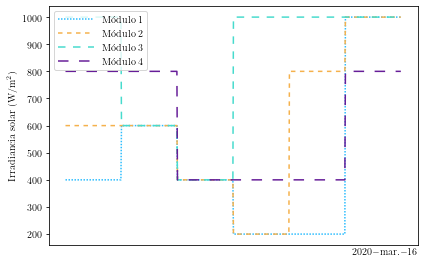

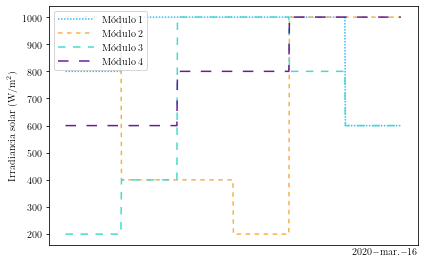

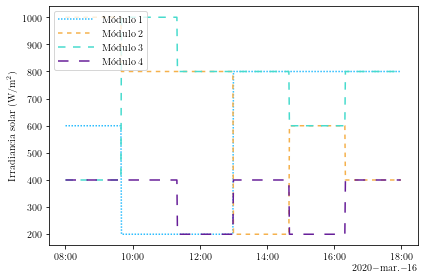

In [53]:
for i, day in enumerate(DAY_INDEX_TRAIN, start=1):
    if day > 15:
        df = df_train_day[day + 10]
        df = add_day_offset(df, days=-10)
    else:
        df = df_train_day[day]
        
    fig = plot(df)
    # fig.savefig(f'output/fig_10_train_day_{i:02}.pdf', bbox_inches='tight')
    # plt.close(fig)

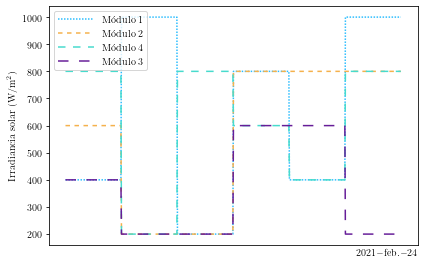

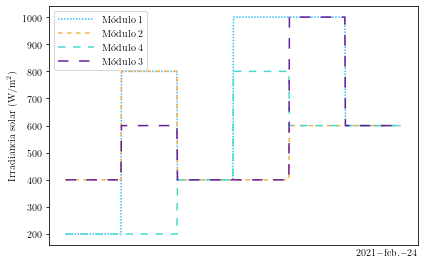

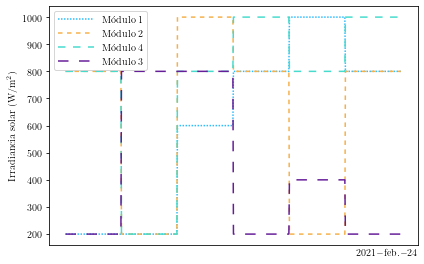

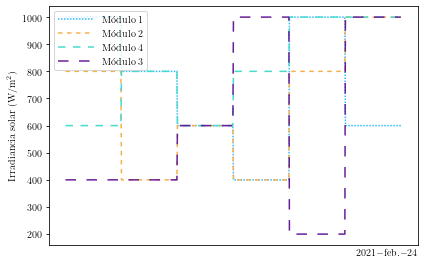

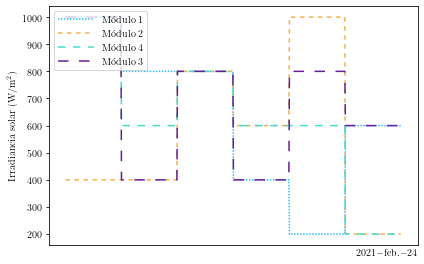

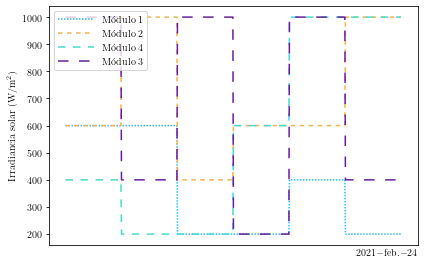

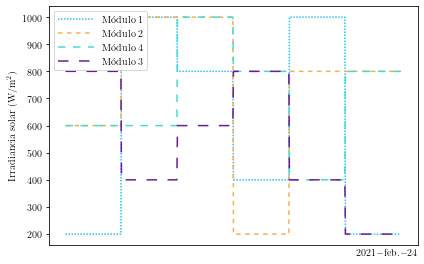

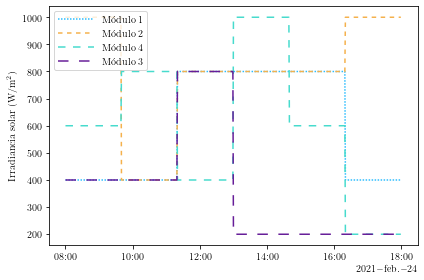

In [54]:
for i, day in enumerate(DAY_INDEX_TEST, start=1):
    fig = plot(df_test_day[day])
    fig.savefig(f'output/fig_11_test_day_{i:02}.pdf', bbox_inches='tight')
    # plt.close(fig)